In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C
import os
import mahotas as mh
import nibabel as nib
import nrrd
import skimage.morphology
import cv2

In [3]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [4]:
images, labels = C.Helper.load_data(DATAPATH)

In [5]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train[2]

'62.img.nrrd'

In [8]:
TS_PATH='TS'

In [9]:
segment_62_l = TS_PATH + "/62/common_carotid_artery_left.nii.gz"
segment_62_r = TS_PATH + "/62/common_carotid_artery_right.nii.gz"
img_62_l = nib.load(segment_62_l)
img_62_r = nib.load(segment_62_r)
data_62_l = img_62_l.get_fdata()
data_62_r = img_62_r.get_fdata()

In [10]:
combined = data_62_l + data_62_r

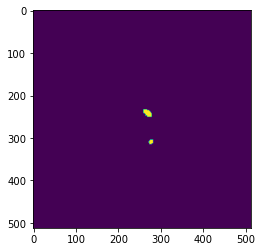

In [11]:
plt.imshow(combined[:,:,54])
plt.show()

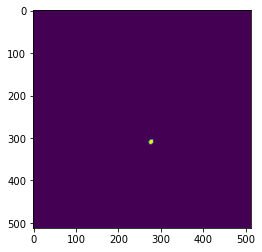

In [12]:
plt.imshow(data_62_l[:,:,54])
plt.show()

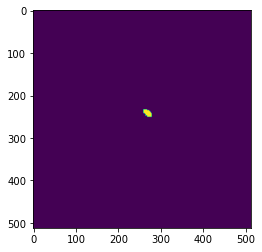

In [13]:
plt.imshow(data_62_r[:,:,54])
plt.show()

In [14]:
combined.shape

(512, 512, 268)

In [15]:
from skimage.filters import threshold_otsu

In [16]:
# setting filter to the image
img = combined[:, :, 54]
# otsu method
T_otsu = threshold_otsu(img)
  
# image values should be greater than otsu value
img = img > T_otsu

es = np.ones((50, 50), bool)


# dilating image
dilate_img = mh.morph.dilate(img,es)
bbox = mh.bbox(dilate_img)
print(bbox)

[208 339 234 306]


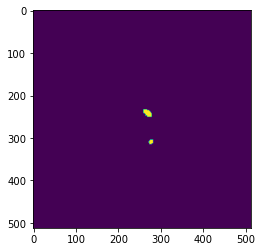

In [17]:
plt.imshow(img)
plt.show()

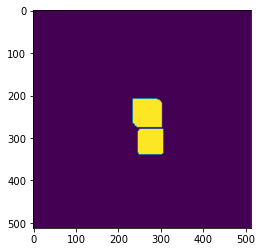

In [18]:
plt.imshow(dilate_img)
plt.show()

In [19]:
images=[]
for i in range(combined.shape[2]):
    # setting filter to the image
    img = combined[:, :, i]
    # otsu method
    T_otsu = threshold_otsu(img)
    # image values should be greater than otsu value
    img = img > T_otsu
    es = np.ones((50, 50), bool)
    # dilating image
    dilate_img = mh.morph.dilate(img,es)
    images.append(dilate_img)

In [20]:
#for i in range(len(images)):
#    plt.imshow(images[i])
#    plt.show()

In [21]:
label, header = nrrd.read(DATAPATH + "/" + y_train[2])

In [22]:
bbox_plaque = mh.bbox(label)

In [23]:
bbox_plaque

array([221, 345, 233, 251, 109, 123])

In [24]:
bbox_combined = mh.bbox(combined)

In [25]:
bbox_combined

array([213, 324, 242, 291,  30, 105])

In [26]:
bbox_combined[4], bbox_plaque[5]

(30, 123)

In [27]:
images=[]

for i in range(bbox_combined[4],bbox_plaque[5]+1):
    img = combined[:, :, i]
    T_otsu = threshold_otsu(img)
    img = img > T_otsu
    es = np.ones((50, 50), bool)
    dilate_img = mh.morph.dilate(img,es)
    bbox = mh.bbox(dilate_img)
    #print(i, bbox)
    
    if np.all(bbox == 0):
        bbox = [bbox_combined[0],bbox_combined[1],bbox_combined[2],bbox_combined[3]]
        dilate_img[bbox[0]:bbox[1], bbox[2]:bbox[3]] = 1
        
    print(i, bbox)
    images.append(dilate_img)


30 [248 301 248 301]
31 [241 306 243 306]
32 [241 306 243 308]
33 [243 308 243 308]
34 [246 310 246 308]
35 [248 312 246 308]
36 [248 312 248 310]
37 [250 315 248 310]
38 [252 317 250 312]
39 [255 319 250 312]
40 [257 321 252 315]
41 [259 324 252 315]
42 [261 326 252 315]
43 [263 328 254 315]
44 [266 330 254 315]
45 [268 330 252 315]
46 [270 333 252 315]
47 [270 333 252 312]
48 [272 335 252 312]
49 [275 335 252 310]
50 [275 335 250 310]
51 [212 337 239 310]
52 [210 337 239 308]
53 [210 339 237 308]
54 [208 339 234 306]
55 [206 339 232 306]
56 [201 339 232 303]
57 [199 341 230 303]
58 [197 341 228 301]
59 [197 344 228 299]
60 [194 344 228 299]
61 [192 344 228 297]
62 [190 346 226 297]
63 [190 346 226 297]
64 [190 346 226 295]
65 [188 346 226 295]
66 [188 348 226 295]
67 [188 348 226 292]
68 [188 348 228 292]
69 [188 348 228 292]
70 [188 348 228 292]
71 [292 348 234 292]
72 [295 346 237 290]
73 [213, 324, 242, 291]
74 [213, 324, 242, 291]
75 [213, 324, 242, 291]
76 [213, 324, 242, 291]
7

In [28]:
len(images)

94

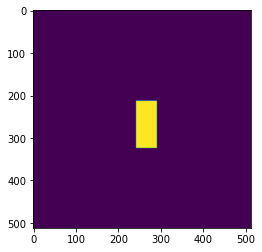

In [29]:
plt.imshow(images[43])
plt.show()

In [30]:
#for i in range(len(images)):
#    plt.imshow(images[i])
#    plt.show()